In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
suicide = pd.read_csv('who_suicide_statistics.csv')
suicide

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0
...,...,...,...,...,...,...
43771,Zimbabwe,1990,male,25-34 years,150.0,NaN
43772,Zimbabwe,1990,male,35-54 years,132.0,NaN
43773,Zimbabwe,1990,male,5-14 years,6.0,NaN
43774,Zimbabwe,1990,male,55-74 years,74.0,NaN


In [5]:
suicide.rename(columns={'country': 'Country', 'year': 'Year', 'sex': 'Gender',
                        'suicides_no': 'Suicides_no', 'population': 'Population',
                       'age': 'Age'}, inplace=True)

In [6]:
suicide.head()

,Country,Year,Gender,Age,Suicides_no,Population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0


In [7]:
suicide.loc[:, 'Age'] = suicide['Age'].str.replace(' years','')
suicide.loc[suicide['Age'] == '5-14', 'Age'] = '05-14'
suicide.loc[suicide['Gender'] == 'female', 'Gender'] = 'Female'
suicide.loc[suicide['Gender'] == 'male', 'Gender'] = 'Male'
suicide['Rate_per_100k'] = suicide['Suicides_no'] / (suicide['Population'] / 100000)
suicide

,Country,Year,Gender,Age,Suicides_no,Population,Rate_per_100k
0,Albania,1985,Female,15-24,NaN,277900.0,NaN
1,Albania,1985,Female,25-34,NaN,246800.0,NaN
2,Albania,1985,Female,35-54,NaN,267500.0,NaN
3,Albania,1985,Female,05-14,NaN,298300.0,NaN
4,Albania,1985,Female,55-74,NaN,138700.0,NaN
...,...,...,...,...,...,...,...
43771,Zimbabwe,1990,Male,25-34,150.0,NaN,NaN
43772,Zimbabwe,1990,Male,35-54,132.0,NaN,NaN
43773,Zimbabwe,1990,Male,05-14,6.0,NaN,NaN
43774,Zimbabwe,1990,Male,55-74,74.0,NaN,NaN


In [8]:
suicide.isnull().any()

Country          False
Year             False
Gender           False
Age              False
Suicides_no       True
Population        True
Rate_per_100k     True
dtype: bool

In [9]:
suicide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43776 entries, 0 to 43775
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country        43776 non-null  object 
 1   Year           43776 non-null  int64  
 2   Gender         43776 non-null  object 
 3   Age            43776 non-null  object 
 4   Suicides_no    41520 non-null  float64
 5   Population     38316 non-null  float64
 6   Rate_per_100k  36060 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 2.3+ MB


In [10]:
suicide['Country'].unique()

array(['Albania', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bermuda', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Cabo Verde', 'Canada', 'Cayman Islands', 'Chile', 'Colombia',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       'Denmark', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Falkland Islands (Malvinas)', 'Fiji',
       'Finland', 'France', 'French Guiana', 'Georgia', 'Germany',
       'Greece', 'Grenada', 'Guadeloupe', 'Guatemala', 'Guyana', 'Haiti',
       'Honduras', 'Hong Kong SAR', 'Hungary', 'Iceland',
       'Iran (Islamic Rep of)', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kiribati', 'Kuwait',
       'Kyrgyzstan', 'Latvia', 'Lithuania

<Figure size 864x576 with 0 Axes>

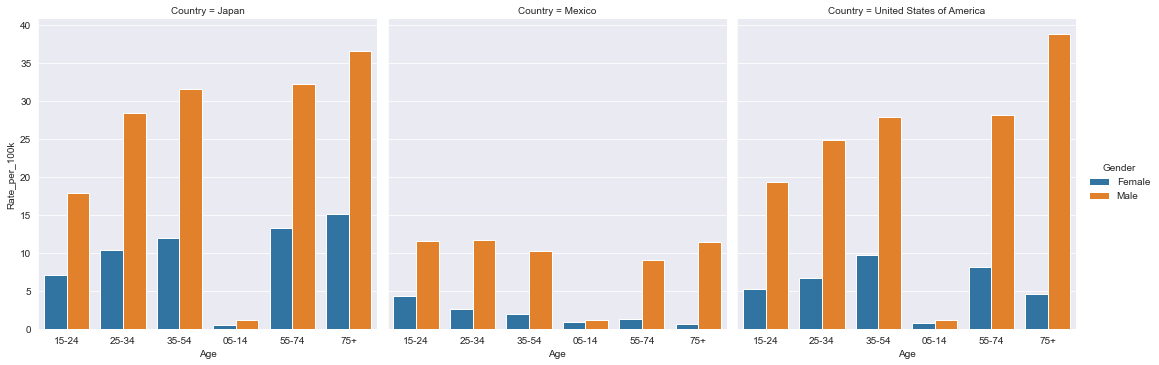

In [11]:
data = suicide.loc[(suicide['Country'].isin(['Mexico', 'Japan', 'United States of America']) &
            (suicide['Year'] == 2015)), ['Country', 'Gender', 'Age', 'Rate_per_100k']]
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
sns.catplot(data=data, x='Age', y='Rate_per_100k', col='Country',
            hue='Gender', col_wrap=3, kind='bar')

In [12]:
suicide.loc[(suicide['Year'] >= 1996) & (suicide['Year'] <= 2005), 'Decade'] = '1996-2005'
suicide.loc[(suicide['Year'] >= 2006) & (suicide['Year'] <= 2015), 'Decade'] = '2006-2015'
decade_grp = suicide.groupby(['Country', 'Decade', 'Gender', 'Age'])['Rate_per_100k'].agg(['median', 'count']).reset_index()
decade_grp

,Country,Decade,Gender,Age,median,count
0,Albania,1996-2005,Female,05-14,0.278641,10
1,Albania,1996-2005,Female,15-24,5.317182,10
2,Albania,1996-2005,Female,25-34,3.682569,10
3,Albania,1996-2005,Female,35-54,2.452446,10
4,Albania,1996-2005,Female,55-74,1.779099,10
...,...,...,...,...,...,...
3043,Virgin Islands (USA),2006-2015,Male,15-24,7.328155,8
3044,Virgin Islands (USA),2006-2015,Male,25-34,34.548291,8
3045,Virgin Islands (USA),2006-2015,Male,35-54,14.601003,8
3046,Virgin Islands (USA),2006-2015,Male,55-74,8.909285,8


In [13]:
decade1 = decade_grp[decade_grp['Decade'] == '1996-2005']
decade2 = decade_grp[decade_grp['Decade'] == '2006-2015']
merged_decade = decade1.merge(decade2, left_on=['Country', 'Gender', 'Age'],
              right_on=['Country', 'Gender', 'Age'], suffixes=['_d1', '_d2'])
merged_decade['Rate_diff'] = merged_decade['median_d2'] - merged_decade['median_d1']
merged_decade

,Country,Decade_d1,Gender,Age,median_d1,count_d1,Decade_d2,median_d2,count_d2,Rate_diff
0,Albania,1996-2005,Female,05-14,0.278641,10,2006-2015,0.000000,5,-0.278641
1,Albania,1996-2005,Female,15-24,5.317182,10,2006-2015,2.276340,5,-3.040842
2,Albania,1996-2005,Female,25-34,3.682569,10,2006-2015,3.268348,5,-0.414221
3,Albania,1996-2005,Female,35-54,2.452446,10,2006-2015,3.041108,5,0.588662
4,Albania,1996-2005,Female,55-74,1.779099,10,2006-2015,2.898659,5,1.119560
...,...,...,...,...,...,...,...,...,...,...
1423,Virgin Islands (USA),1996-2005,Male,15-24,0.000000,9,2006-2015,7.328155,8,7.328155
1424,Virgin Islands (USA),1996-2005,Male,25-34,16.129032,9,2006-2015,34.548291,8,18.419258
1425,Virgin Islands (USA),1996-2005,Male,35-54,13.857133,9,2006-2015,14.601003,8,0.743870
1426,Virgin Islands (USA),1996-2005,Male,55-74,0.000000,9,2006-2015,8.909285,8,8.909285


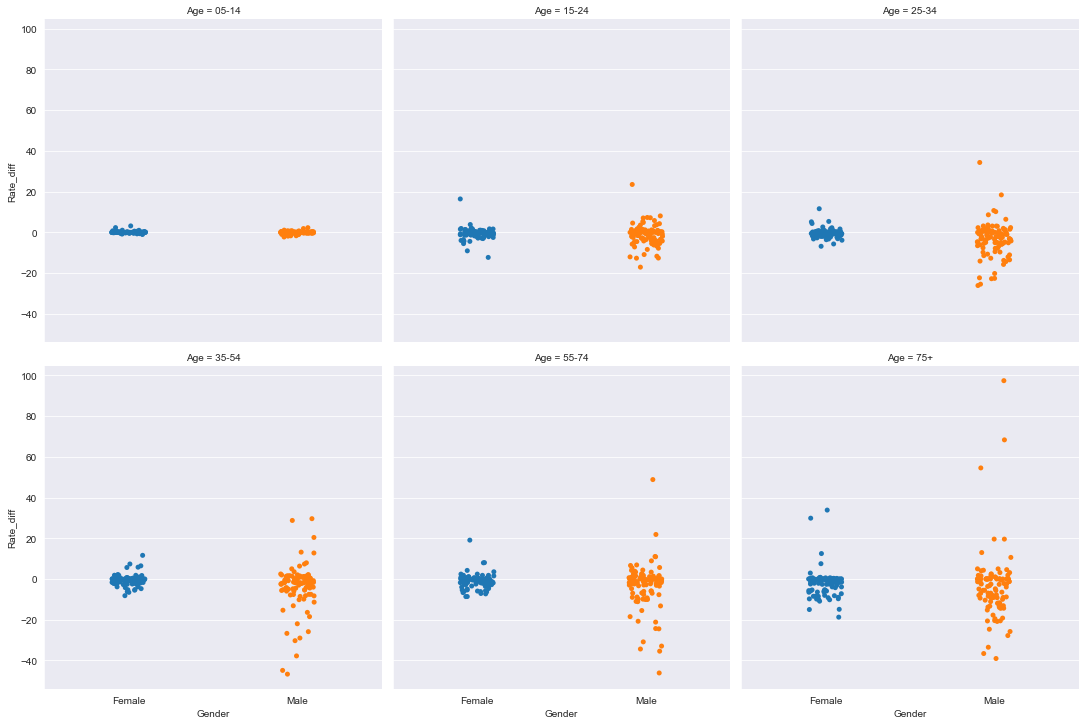

In [14]:
sns.catplot(data=merged_decade, x='Gender', y='Rate_diff', col='Age', col_wrap=3)

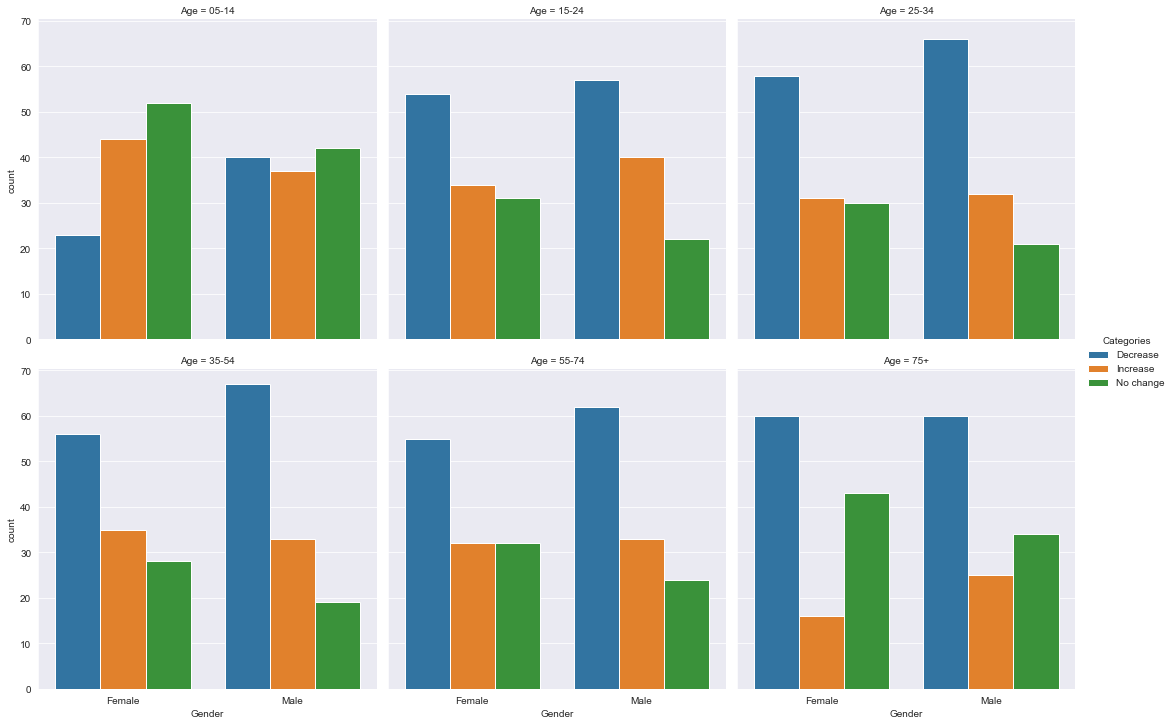

In [15]:
def select_categories(x):
    if x < 0:
        return 'Decrease'
    elif x > 0:
        return 'Increase'
    else:
        return 'No change'
merged_decade['Categories'] = merged_decade['Rate_diff'].apply(lambda x: select_categories(x))
sns.catplot(data=merged_decade, x='Gender', col='Age', kind='count',
            col_wrap=3, hue='Categories')
